# More Interesting Stuff - Returns and Sharpe Ratio

We start off by running what we had written in the previous two sessions

In [3]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [5]:
n = int(input('Please input the number of tickers you want to look at: '))
tickers = []
for i in range(0, n):
    ticker = input(f'Please input ticker {i+1}: ')
    tickers.append(ticker.upper())
print('The tickers you are have chosen are: ', tickers)

start = '2018-07-01'
end = '2021-07-01'

data = pd.DataFrame()
for ticker in tickers:
    data[ticker] = pdr.DataReader(ticker, 'yahoo', start, end)['Adj Close']
data

Please input the number of tickers you want to look at:  4
Please input ticker 1:  C
Please input ticker 2:  F
Please input ticker 3:  WMT
Please input ticker 4:  JNJ


The tickers you are have chosen are:  ['C', 'F', 'WMT', 'JNJ']


,C,F,WMT,JNJ
Date,,,,
2018-07-02,60.115143,9.865203,79.140015,110.838142
2018-07-03,59.130527,9.767438,79.554558,111.868294
2018-07-05,59.578068,9.820765,79.677017,113.955963
2018-07-06,60.097233,9.829651,79.620514,114.639709
2018-07-09,61.708420,9.954077,80.958328,114.913200
...,...,...,...,...
2021-06-25,70.508698,15.113897,138.022095,162.177704
2021-06-28,70.469269,14.885051,137.593674,161.990051
2021-06-29,68.665901,14.934800,136.796600,161.999924


Now that we have our data, let's look at their returns and Sharpe Ratio.
<br>
But first let's get the S&P 500 data as a market benchmark, we'll use the longer method because it's only one asset.

In [11]:
sp500 = pdr.DataReader('^GSPC', 'yahoo', start, end)['Adj Close']
# On Yahoo Finance, the S&P 500 ticker is ^GSPC.
# We can find other indexes if we wanted to; we can simply search it on Yahoo Finance.

sp500

Date
2018-07-02    2726.709961
2018-07-03    2713.219971
2018-07-05    2736.610107
2018-07-06    2759.820068
2018-07-09    2784.169922
                 ...     
2021-06-25    4280.700195
2021-06-28    4290.609863
2021-06-29    4291.799805
2021-06-30    4297.500000
2021-07-01    4319.939941
Name: Adj Close, Length: 756, dtype: float64

Since our data are all based on price, it would be a pretty dumb comparison to assess it like this.
<br>
So, let's change it to returns and we'll apply logarithms on the result to make it more comparable.

To find returns, we first apply the percentage change function _**pct_change().**_
<br>
Then, we apply logarithms (logs) by using the _numpy_ package that we had previously imported: _**np.log().**_

For simplicity, we shall just use 3 stocks plus the market in our current portfolio.

In [12]:
portfolio = pd.DataFrame()
# We create an empty dataframe to save the price data

portfolio_returns = pd.DataFrame()
# We create a empty dataframe to track the returns of the portfolio

for ticker in tickers:
    portfolio[ticker] = pdr.DataReader(ticker, 'yahoo', start, end)['Adj Close']
    # This above line is simply the same as what we had before - just grabbing the adjusted close data
    
    portfolio_returns[f'{ticker} Returns'] = np.log((portfolio[ticker])).pct_change()
    # Here we have used an f-string again since we want the column name to be, e.g., JPM Returns and only,
    # the name of the ticker would change each time so we put that variable in the {}.
    
    # We then take log of this using the np.log() function.
    
    # We then take the percentage change with the pct_change() function - the default is comparing it to 
    # the previous value - which is what we need to find daily percentage change.
        # NOTE: If we wanted to see the percentage difference between today's price and 5 day's ago, we would
        # use pct_change(5)
    
portfolio_returns

,C Returns,F Returns,WMT Returns,JNJ Returns
Date,,,,
2018-07-02,NaN,NaN,NaN,NaN
2018-07-03,-0.004032,-0.004351,0.001195,0.001965
2018-07-05,0.001848,0.002389,0.000351,0.003920
2018-07-06,0.002123,0.000396,-0.000162,0.001263
2018-07-09,0.006459,0.005504,0.003807,0.000503
...,...,...,...,...
2021-06-25,0.000757,-0.001690,0.002393,0.001009
2021-06-28,-0.000131,-0.005618,-0.000631,-0.000228
2021-06-29,-0.006092,0.001236,-0.001180,0.000012


This is great, but we want to see it actually pictured.

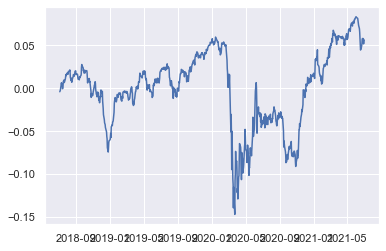

In [13]:
plt.plot(portfolio_returns['C Returns'].cumsum())
# Here we are taking the cumulative sum of the returns of the JPM's returns
# plt is the matplotlib.pyplat package we had imported previously

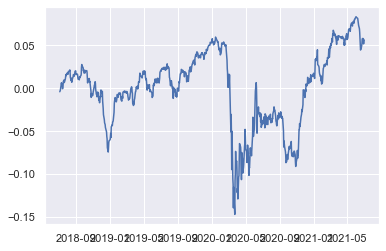

In [14]:
# Notice how we have:
# [<matplotlib.lines.Line2D at 0x2967d992508>]
# at the top of the graph.
# We can get rid of it by adding a semi-colon ; at the end of our plot function (or plt.show() function)

plt.plot(portfolio_returns['C Returns'].cumsum());

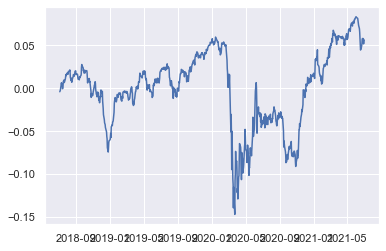

In [15]:
import matplotlib
# Let's try plotting without the plt

matplotlib.pyplot.plot(portfolio_returns['C Returns'].cumsum());
# Works the same but too much effort

# We enter the data we want in the parenthesis
# We have also stated the cumsum() function on top of the returns because we want to look at the
# cumulative sum.

# There are many more parameters we can add into the plot function and a lot more we can do.
# We can check the Python code by hitting SHIFT+TAB after the plot parenthesis, or we could go 
# into the actual package and learn about it online.
    # It should have its own website which you can read through, but not completely necessary at 
    # this stage in time.
    # Only when you want to push the boundaries of what you can do after knowing how to plot should
    # you dive into those stuff.

# We shall show this below.

Let's make this prettier and for all assets:

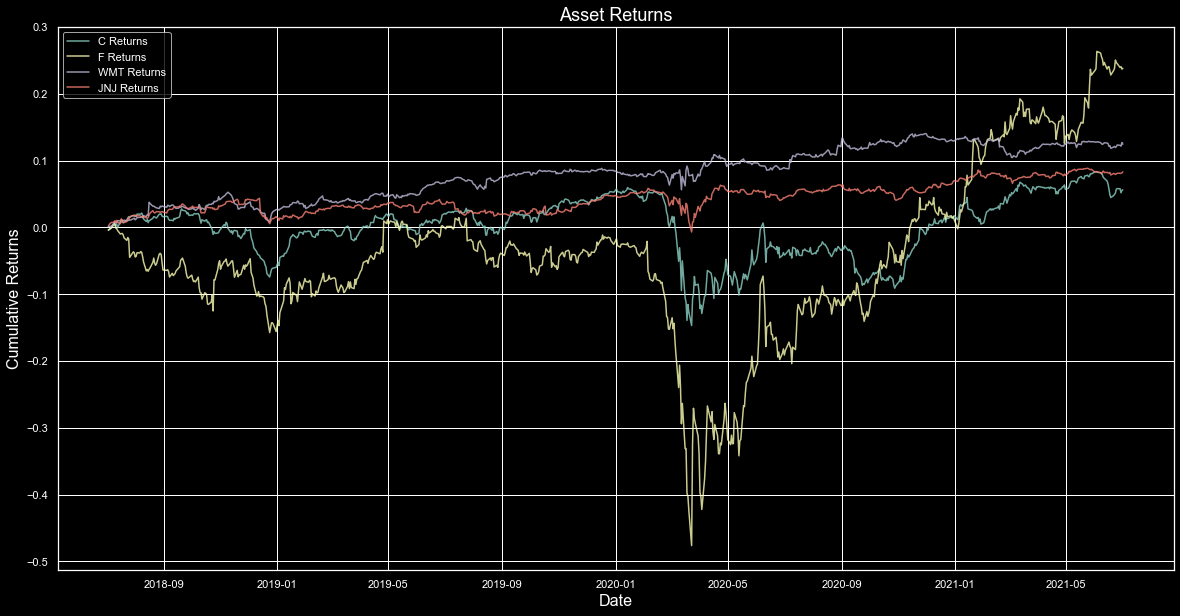

In [16]:
with plt.style.context('dark_background'):
    # We first state what the style of the figure will be - this is unnecessary but it just makes it
    # look a little better.
    # Since we have a colon at the end of our code, the next line needs to be indented, otherwise it 
    # would come out of the code block and the codes that are not indented will not be to the style.
    
    plt.figure(figsize=(20,10))
    # This sets the size of the figure that we will be using.
    
    plt.grid('on')
    # This gives the gridlines - I had this turned off, and it is turned off by default.
    # If you want this off just change the on to off.
    
    plt.plot(portfolio_returns.cumsum(), alpha=0.8)
    # Once we call plot, it does not immediately show the plot until the plt.show() function runs,
    # or if we reach the end of the code block.
    
    cols = []
    for i in portfolio_returns.columns:
    # The .columns function simply grabs all the names of the columns in the dataframe.
    
        cols.append(i)
        # We then append it to our empty list called cols
        
    plt.legend(cols)
    # To get the column names, we do a simple for loop, grabbing all the names of each of the columns
    # and adding it into our empty list.
    # We then plot the cols
    
    # We want to do it this way because we could have 10 or 20 different assets and Python won't automatically 
    # recognise their names and we're not going to do this manually, so this is (in my current opinion) the best way.
    
    plt.xlabel('Date', fontsize = 16)
    plt.ylabel('Cumulative Returns', fontsize = 16)
    
    plt.title('Asset Returns', fontsize=18)

    plt.show();

Now let's look for the Sharpe Ratio.
<br>
First, we will need the returns from the S&P 500.

In [17]:
sp500_returns = (np.log(sp500)).pct_change()
# This is exactly what we did for the 4 assets - logged the price then took percentage changes.

sharpe_ratio = pd.DataFrame()
for ticker in tickers:
    sharpe_ratio[ticker] = (portfolio_returns[f'{ticker} Returns'] - sp500_returns) / portfolio_returns[f'{ticker} Returns'].std()
    # Here we are simply calculating the sharpe ratio for each of the assets
    # The formula is:
        # Asset Returns - Market Returns / Asset Volatility (or Standard Deviation)

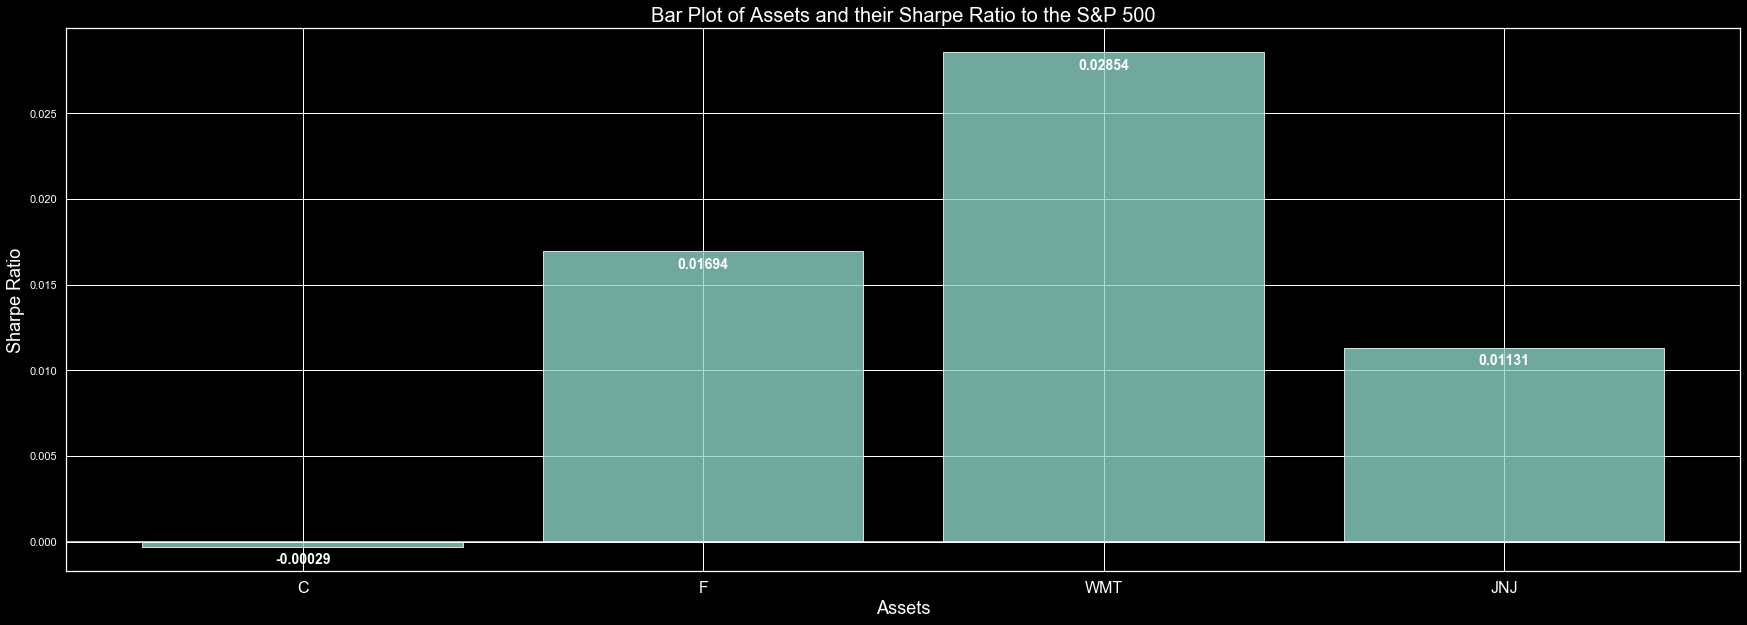

In [18]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(30,10))
    plt.grid('off')
    sharpe_bar = plt.bar(tickers, round(sharpe_ratio.mean(), 5), alpha=0.8)
    # Here we are plotting the sharpe ratio as a histogram or bar plot.
    # Each bar will be the average sharpe ratio for that asset
    # We have an alpha here of 0.8 which just means 80% opacity.
    
    for i in sharpe_bar:
        height = i.get_height()
        # Here we are getting the height of the bar which is just average sharpe ratio value for that asset.
        
        plt.annotate('{}'.format(height),
                    xy=(i.get_x() + i.get_width() / 2, height),
                    xytext=(0, -20), # 3 Vertical Offsets
                    textcoords='offset points',
                    ha='center', va='bottom', color='White', 
                     fontweight='bold', fontsize=14)
        # The plt.annotate function allows us to draw on the graph itself
        # The exact details of the annotations are rather specific to this.
        # It is best to look into the official documents online to get an exact understanding on this.
        
    plt.axhline(y = 0)
    # Here we are plotting a horizontal line at 0 from the y axis.
        
    plt.xlabel('Assets' ,fontsize=18)
    # The xlabel allows us to give a name to the x-axis
    # We name the x-axis as Assets and give the fontsize a value of 18.
    
    plt.xticks(fontsize=16)
    # xticks changes the size of the labels, in this case the fontsize of the tickers.
    # We can also make them slanted or tilted, but that is not necessary for this 
    # particular example.
    
    plt.ylabel('Sharpe Ratio', fontsize = 18)
    # Here we are naming the y-axis as Sharpe Ratio with a fontsize of 18.
    
    plt.title('Bar Plot of Assets and their Sharpe Ratio to the S&P 500', fontsize = 20)
    # The title of the plot with a fontsize of 20.
    
    plt.show();
    # Here we show the plot.
    # It will typically show anyway, but if we don't have this function, we'll get 
    # odd lines of codes that say the functions have ran, and it won't look pretty
    # with random lines of codes before our plot, hence we have this line.

Now let's put this all together.

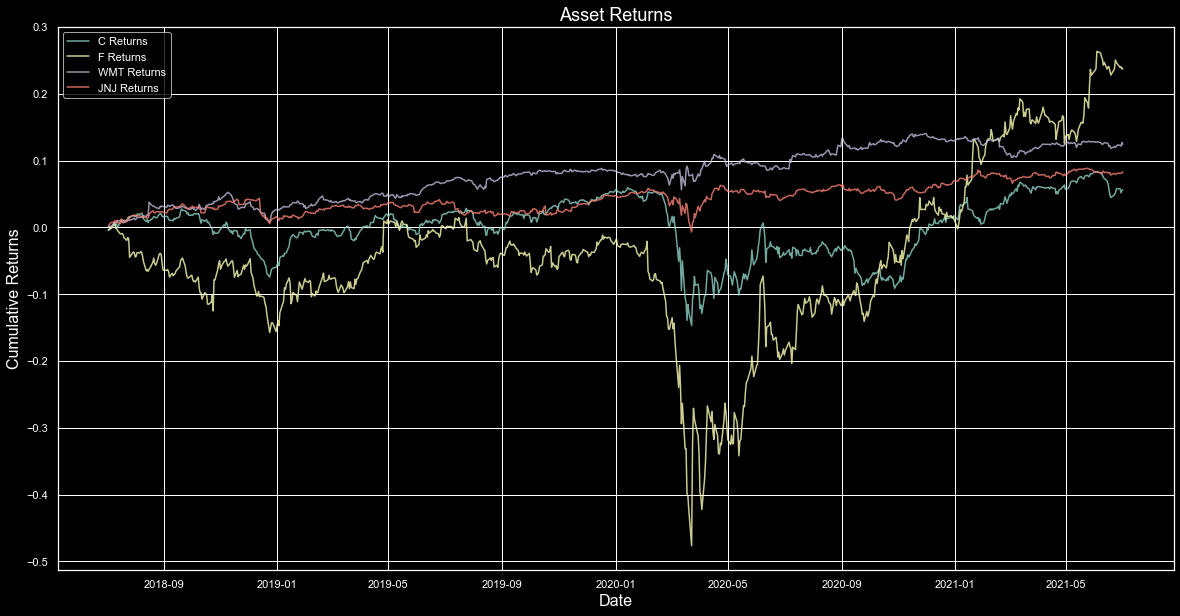

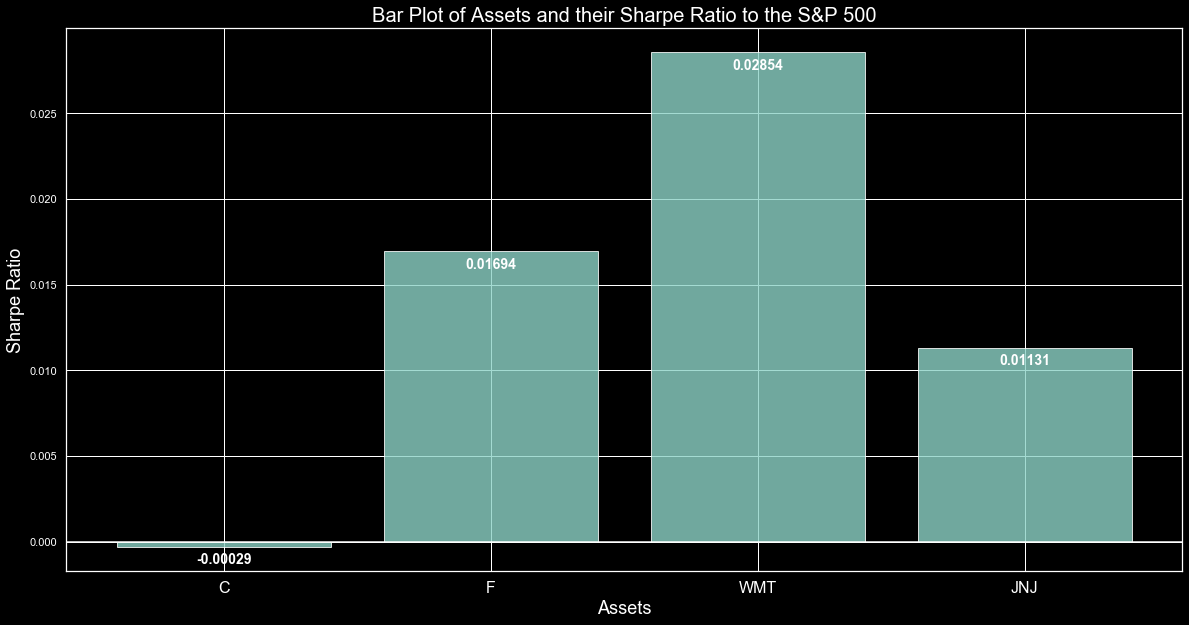

In [19]:
portfolio = pd.DataFrame()
portfolio_returns = pd.DataFrame()
for ticker in tickers:
    portfolio[ticker] = pdr.DataReader(ticker, 'yahoo', start, end)['Adj Close']
    portfolio_returns[f'{ticker} Returns'] = np.log((portfolio[ticker])).pct_change()
    
with plt.style.context('dark_background'):
    plt.figure(figsize=(20,10))
    plt.grid('on')
    plt.plot(portfolio_returns.cumsum(), alpha=0.8)
    cols = []
    for i in portfolio_returns.columns:
        cols.append(i)
    plt.legend(cols)
    plt.xlabel('Date', fontsize = 16)
    plt.ylabel('Cumulative Returns', fontsize = 16)
    
    plt.title('Asset Returns', fontsize=18)
    plt.show();
    
sharpe_ratio = pd.DataFrame()
for ticker in tickers:
    sharpe_ratio[ticker] = (portfolio_returns[f'{ticker} Returns'] - sp500_returns) / portfolio_returns[f'{ticker} Returns'].std()
    
with plt.style.context('dark_background'):
    plt.figure(figsize=(20,10))
    sharpe_bar = plt.bar(tickers, round(sharpe_ratio.mean(), 5), alpha=0.8)
    for i in sharpe_bar:
        height = i.get_height()
        plt.annotate('{}'.format(height),
                    xy=(i.get_x() + i.get_width() / 2, height),
                    xytext=(0, -20), # 3 Vertical Offsets
                    textcoords='offset points',
                    ha='center', va='bottom', color='White', 
                     fontweight='bold', fontsize=14)
    plt.axhline(y = 0)
    plt.xlabel('Assets' ,fontsize=18)
    plt.xticks(fontsize=16)
    plt.ylabel('Sharpe Ratio', fontsize = 18)
    plt.title('Bar Plot of Assets and their Sharpe Ratio to the S&P 500', fontsize = 20)
    plt.show();